In [97]:
import pandas as pd
# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("winequality_BE.csv", delimiter = ';')

In [98]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   object 
 12  quality               3232 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.4+ KB


In [99]:
raw_dataset["alcohol"].value_counts()

alcohol
9.5                    223
9.4                    187
9.2                    143
10                     122
10.5                   122
                      ... 
956.666.666.666.667      1
110.666.666.666.667      1
8.0                      1
8                        1
10.75                    1
Name: count, Length: 70, dtype: int64

Alcohol tiene valores no válidos

Densidad tiene valores no válidos, HOLA

In [100]:
raw_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,7.659762,0.398776,0.302051,4.625511,0.066318,25.968131,94.803682,2.047836,3.253153,0.574449,5.728651
std,1.509350,0.193020,0.160235,4.387036,0.042074,17.333965,61.488085,9.124916,0.164035,0.166100,0.854472
min,4.200000,0.100000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987130,2.720000,0.220000,3.000000
25%,6.700000,0.250000,0.220000,1.900000,0.042000,12.000000,38.000000,0.993780,3.140000,0.460000,5.000000
50%,7.300000,0.350000,0.300000,2.500000,0.059000,23.000000,92.000000,0.995900,3.240000,0.550000,6.000000
75%,8.200000,0.530000,0.390000,6.400000,0.080000,36.000000,142.000000,0.997430,3.360000,0.650000,6.000000
max,15.900000,1.580000,1.230000,65.800000,0.611000,146.500000,344.000000,103.898000,4.010000,2.000000,8.000000


In [101]:
dataset_modificado = raw_dataset.copy()

LIMPIEZA DE DATOS

In [102]:

dataset_modificado['alcohol'] = dataset_modificado['alcohol'].apply(lambda x: x.replace('.', ',', 1))
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].str.replace('.', '')
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].str.replace(',', '.')
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].astype(float)

# convierte alchol a de object a float

In [103]:
dataset_modificado["alcohol"].value_counts().sort_index(ascending=False)

alcohol
956.666667     1
923.333333     1
135.666667     1
110.666667     1
100.333333     2
              ..
8.700000      25
8.600000       7
8.500000       2
8.400000       2
8.000000       2
Name: count, Length: 69, dtype: int64

Çambiamos los valores fuera de rango, ya que evaluamos que pueden ser valores reales ingresados de forma incorrecta:
956.666667     = 9,56
923.333333     = 9,23
135.666667     = 13,56
110.666667     = 11,6
100.333333     = 10,3

In [104]:
dataset_modificado["alcohol"] = dataset_modificado["alcohol"].astype("double")

In [105]:
conteo = dataset_modificado[dataset_modificado['density'] > 1]['density'].count()

print(conteo)

113


In [106]:
import numpy as np

# Usar numpy.isclose para comparar con tolerancia
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 956.666667), 'alcohol'] = 9.56
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 923.333333), 'alcohol'] = 9.23
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 135.666667), 'alcohol'] = 13.56
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 110.666667), 'alcohol'] = 11.6
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 100.333333), 'alcohol'] = 10.3

dataset_modificado["alcohol"].value_counts().sort_index(ascending=False)

alcohol
14.90     1
14.00     9
13.70     2
13.60     4
13.56     1
         ..
8.70     25
8.60      7
8.50      2
8.40      2
8.00      2
Name: count, Length: 67, dtype: int64

ELIMINAMOS REPETIDOS


In [107]:
# imprimimos las filas duplicadas
dataset_modificado[dataset_modificado.duplicated(keep=False)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,Viogner,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
7,Viogner,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
8,Viogner,6.4,0.220,0.49,7.50,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6
9,Viogner,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7
11,Viogner,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,Merlot,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
3212,Merlot,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3214,Merlot,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3225,Merlot,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [108]:
# eliminamos los duplicados
dataset_modificado.drop_duplicates(keep="first", inplace=True)
# contamos la cantidad de duplicados
dataset_modificado.duplicated().sum()

0

In [109]:
df_filtrado["density"].value_counts().sort_index(ascending=False)

density
1.00000    15
0.99990     2
0.99980    12
0.99976     4
0.99975     1
           ..
0.98870     1
0.98865     1
0.98836     1
0.98802     1
0.98713     1
Name: count, Length: 734, dtype: int64

In [110]:
condicion = dataset_modificado['density'] <= 1 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_filtrado = dataset_modificado[condicion]
df_filtrado["density"].value_counts().sort_index(ascending=False)

density
1.00000    15
0.99990     2
0.99980    12
0.99976     4
0.99975     1
           ..
0.98870     1
0.98865     1
0.98836     1
0.98802     1
0.98713     1
Name: count, Length: 734, dtype: int64

In [111]:
#Paso las columas de dioxido de sulfuro total y libre a gramos por litro para que quede en la misma escala que las demas variables. Tambien la de densidad de gramos por centimetro cubico a gramos por litro

df_filtrado['total sulfur dioxide'] = df_filtrado['total sulfur dioxide'] / 1000
df_filtrado['free sulfur dioxide'] = df_filtrado['free sulfur dioxide'] / 1000
df_filtrado['density'] = df_filtrado['density'] * 1000
df_filtrado


C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\2277396877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['total sulfur dioxide'] = df_filtrado['total sulfur dioxide'] / 1000
C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\2277396877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['free sulfur dioxide'] = df_filtrado['free sulfur dioxide'] / 1000
C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\2277396877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


In [147]:
import webbrowser
import pandas_profiling as pp
from pathlib import Path

nombre_archivo = "vinos"

# Generamos el reporte
report = pp.ProfileReport(df_filtrado)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')



c:\Users\Tomas\Desktop\Tomi Ilari\Facu\Fund\practico2\Tp-ciencia-de-datos-\.venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

In [113]:

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2575 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  2575 non-null   object 
 1   fixed acidity         2575 non-null   float64
 2   volatile acidity      2575 non-null   float64
 3   citric acid           2575 non-null   float64
 4   residual sugar        2575 non-null   float64
 5   chlorides             2575 non-null   float64
 6   free sulfur dioxide   2575 non-null   float64
 7   total sulfur dioxide  2575 non-null   float64
 8   density               2575 non-null   float64
 9   pH                    2575 non-null   float64
 10  sulphates             2575 non-null   float64
 11  alcohol               2575 non-null   float64
 12  quality               2575 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 281.6+ KB


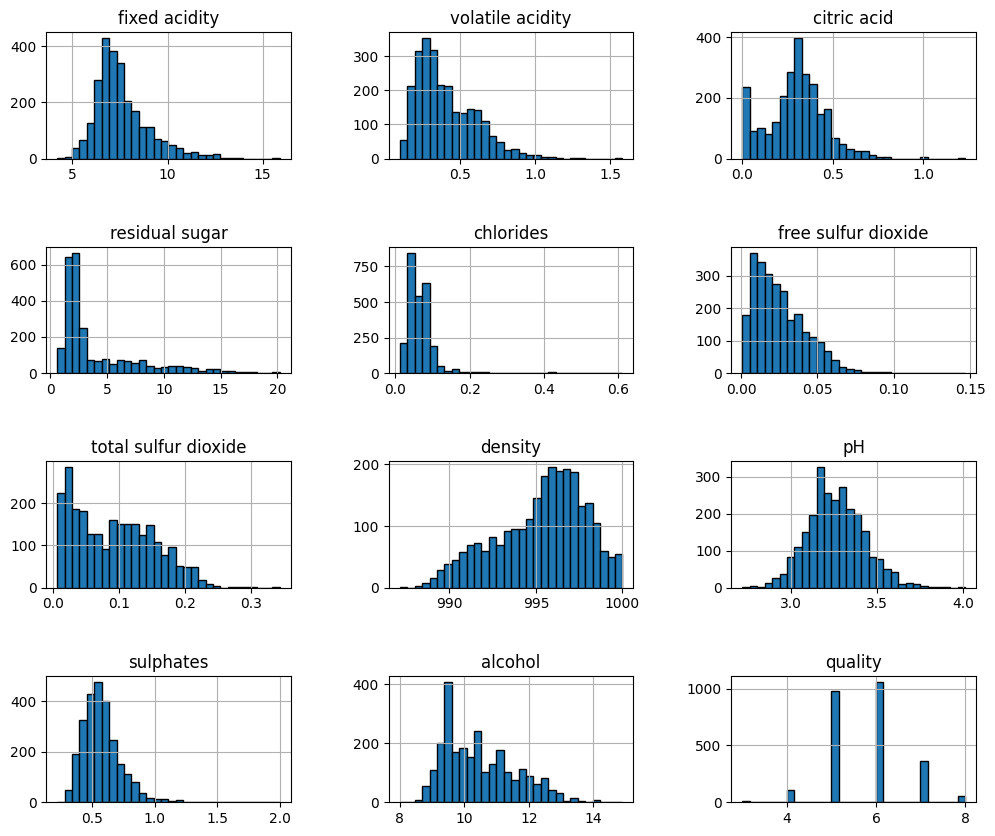

In [114]:
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
# construimos una serie de histogramas mostrando la distribución de las features
df_filtrado.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

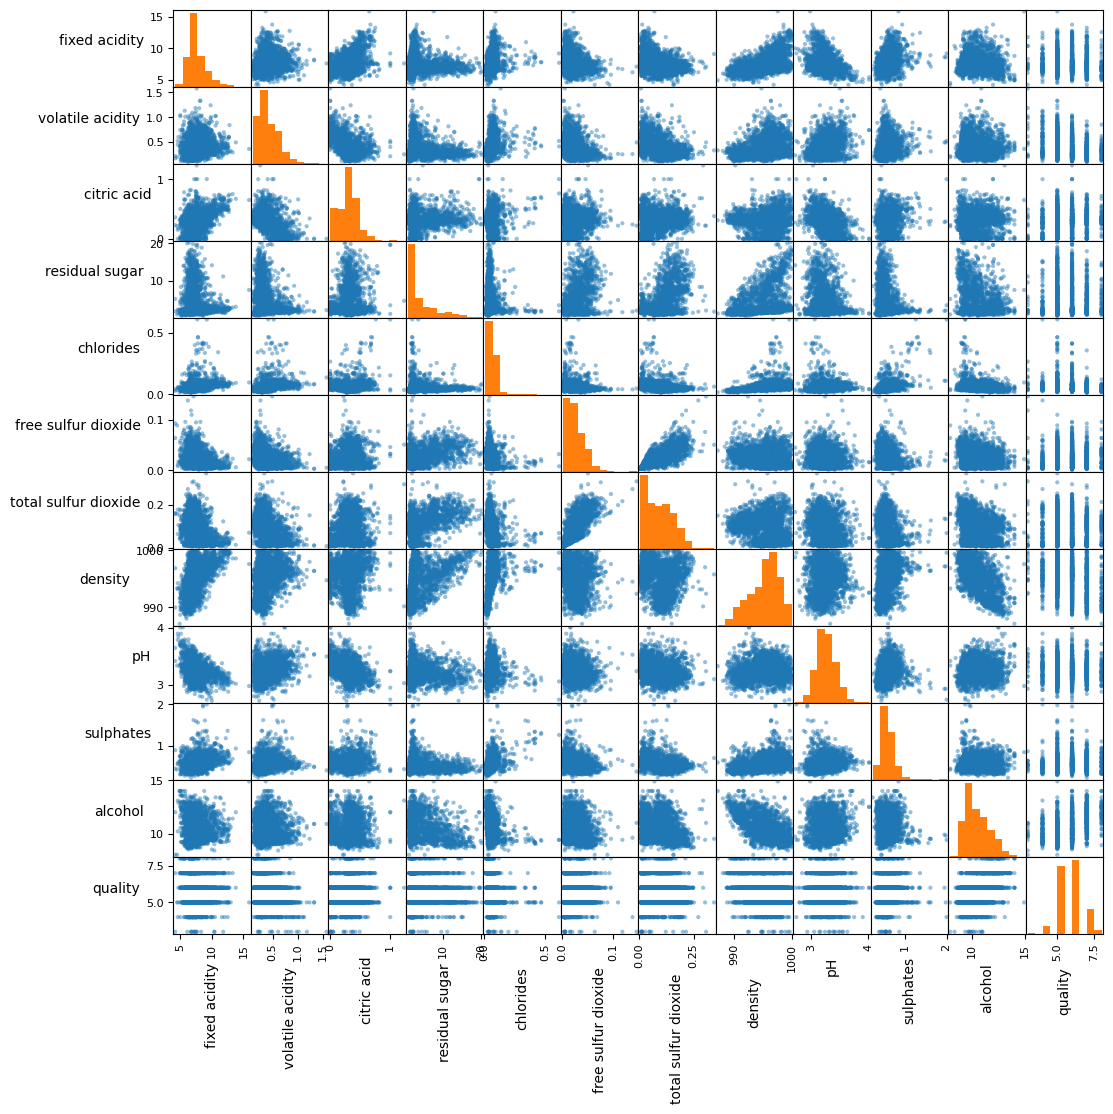

In [115]:
# Seleccionar las columnas numéricas
numeric_cols = df_filtrado.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

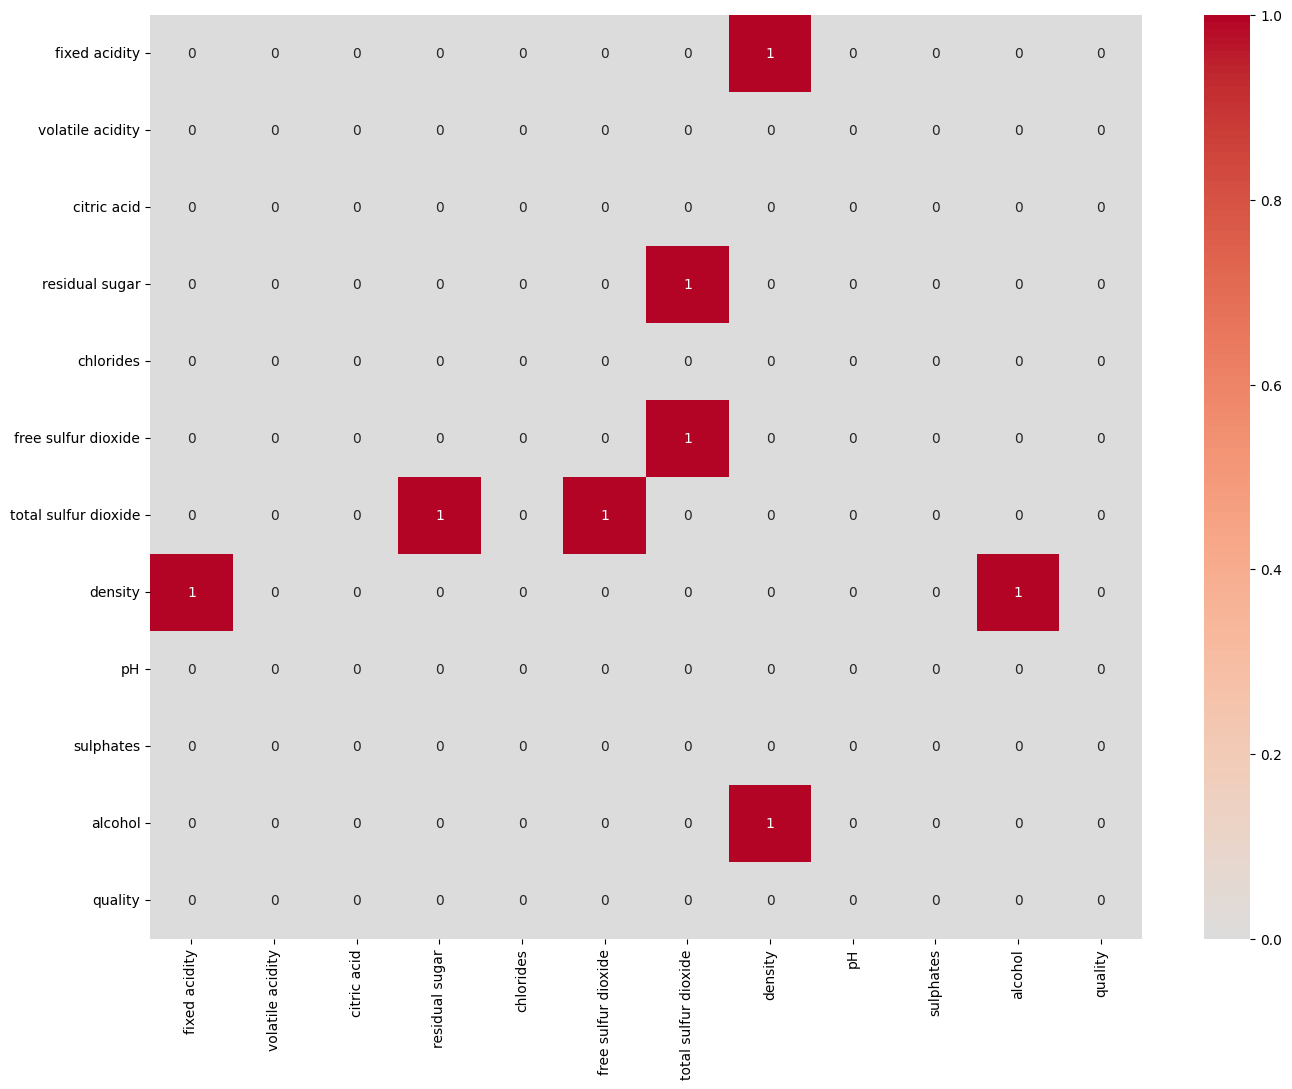

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_filtrado.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.5
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

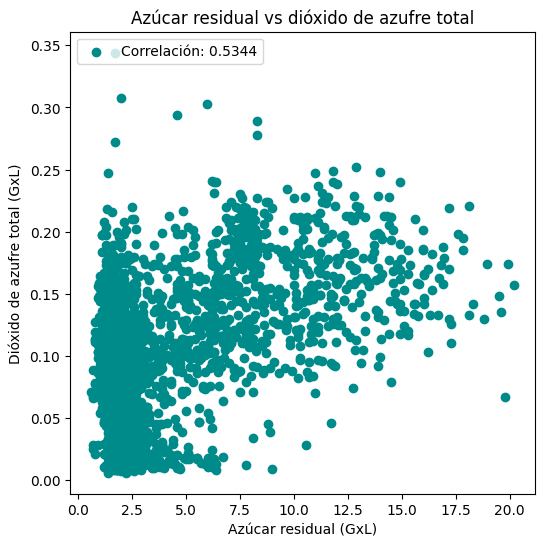

In [117]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["residual sugar"]
datos_columna2 = df_filtrado["total sulfur dioxide"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#008b8b")

# Añadir etiquetas y título
plt.xlabel("Azúcar residual (GxL)")
plt.ylabel("Dióxido de azufre total (GxL)")
plt.title("Azúcar residual vs dióxido de azufre total")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



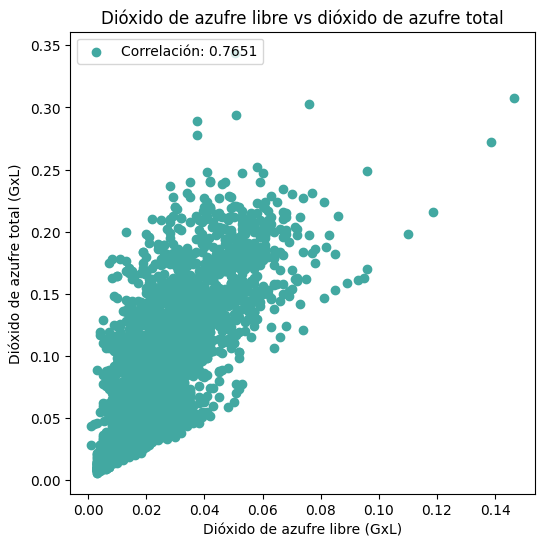

In [118]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["free sulfur dioxide"]
datos_columna2 = df_filtrado["total sulfur dioxide"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

# Añadir otra variable en color verde
plt.scatter(datos_columna1, datos_columna2, c="#42A8A1")

# Añadir etiquetas y título
plt.xlabel("Dióxido de azufre libre (GxL)")
plt.ylabel("Dióxido de azufre total (GxL)")
plt.title("Dióxido de azufre libre vs dióxido de azufre total")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



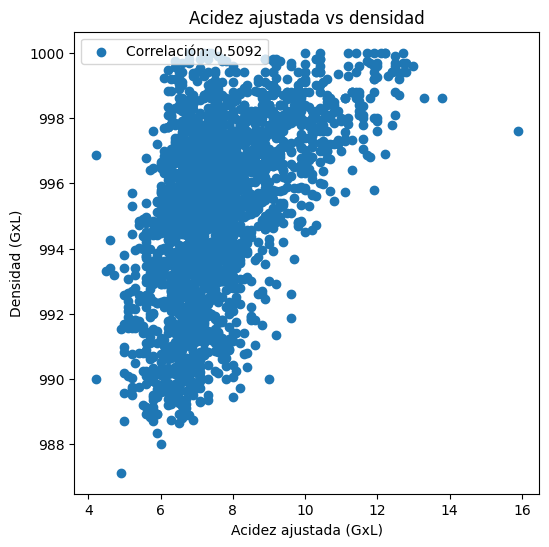

In [119]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["fixed acidity"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

# Añadir otra variable en color verde
plt.scatter(datos_columna1, datos_columna2)

# Añadir etiquetas y título
plt.xlabel("Acidez ajustada (GxL)")
plt.ylabel("Densidad (GxL)")
plt.title("Acidez ajustada vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



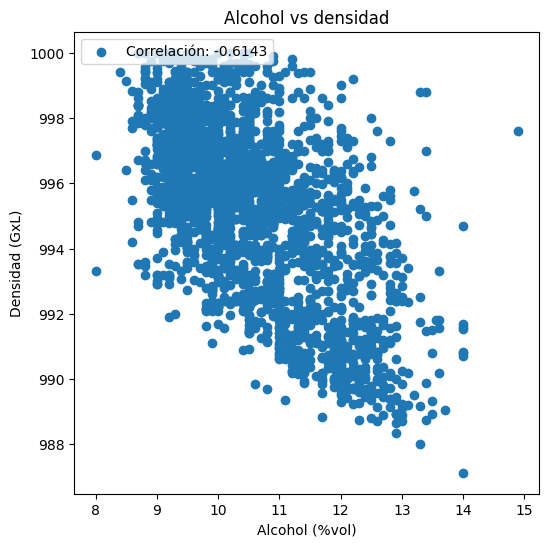

In [120]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["alcohol"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

# Añadir otra variable en color verde
plt.scatter(datos_columna1, datos_columna2)

# Añadir etiquetas y título
plt.xlabel("Alcohol (%vol)")
plt.ylabel("Densidad (GxL)")
plt.title("Alcohol vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



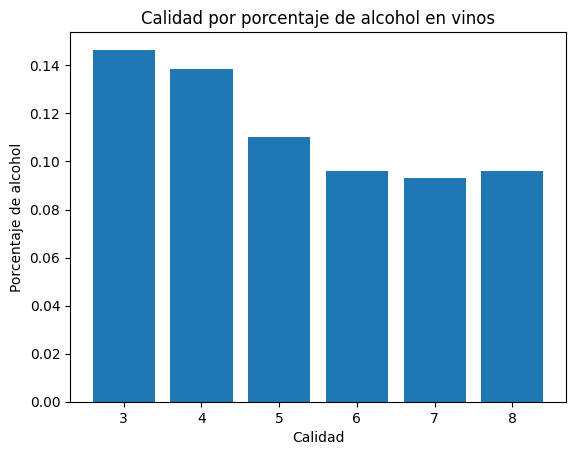

In [121]:
plt.bar(df_filtrado["quality"], df_filtrado["free sulfur dioxide"])

# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Porcentaje de alcohol")

# Agregar un título al gráfico
plt.title("Calidad por porcentaje de alcohol en vinos")
#plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
0
# Mostrar el gráfico
plt.show()

In [122]:
condicion = dataset_modificado['quality'] == 8 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_max_calidad = dataset_modificado[condicion]
df_max_calidad.head(10)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
32,Viogner,6.5,0.13,0.37,1.00,0.036,48.0,114.0,0.99110,3.41,0.51,11.5,8
82,Viogner,6.5,0.18,0.34,1.60,0.040,43.0,148.0,0.99120,3.32,0.59,11.5,8
145,Viogner,6.4,0.15,0.36,1.80,0.034,43.0,150.0,0.99220,3.42,0.69,11.0,8
164,Viogner,6.9,0.25,0.27,9.05,0.039,37.0,128.0,0.99360,3.27,0.34,11.3,8
347,Viogner,7.6,0.20,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8
665,Viogner,6.3,0.41,0.18,3.50,0.027,23.0,109.0,0.99018,3.34,0.54,12.8,8
700,Viogner,6.8,0.37,0.28,1.90,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,8
709,Viogner,7.7,0.40,0.27,4.50,0.034,27.0,95.0,0.99175,3.21,0.59,12.3,8
749,Viogner,6.9,0.15,0.28,4.40,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8
756,Viogner,6.8,0.46,0.26,2.70,0.042,28.0,83.0,0.99114,3.38,0.51,12.0,8


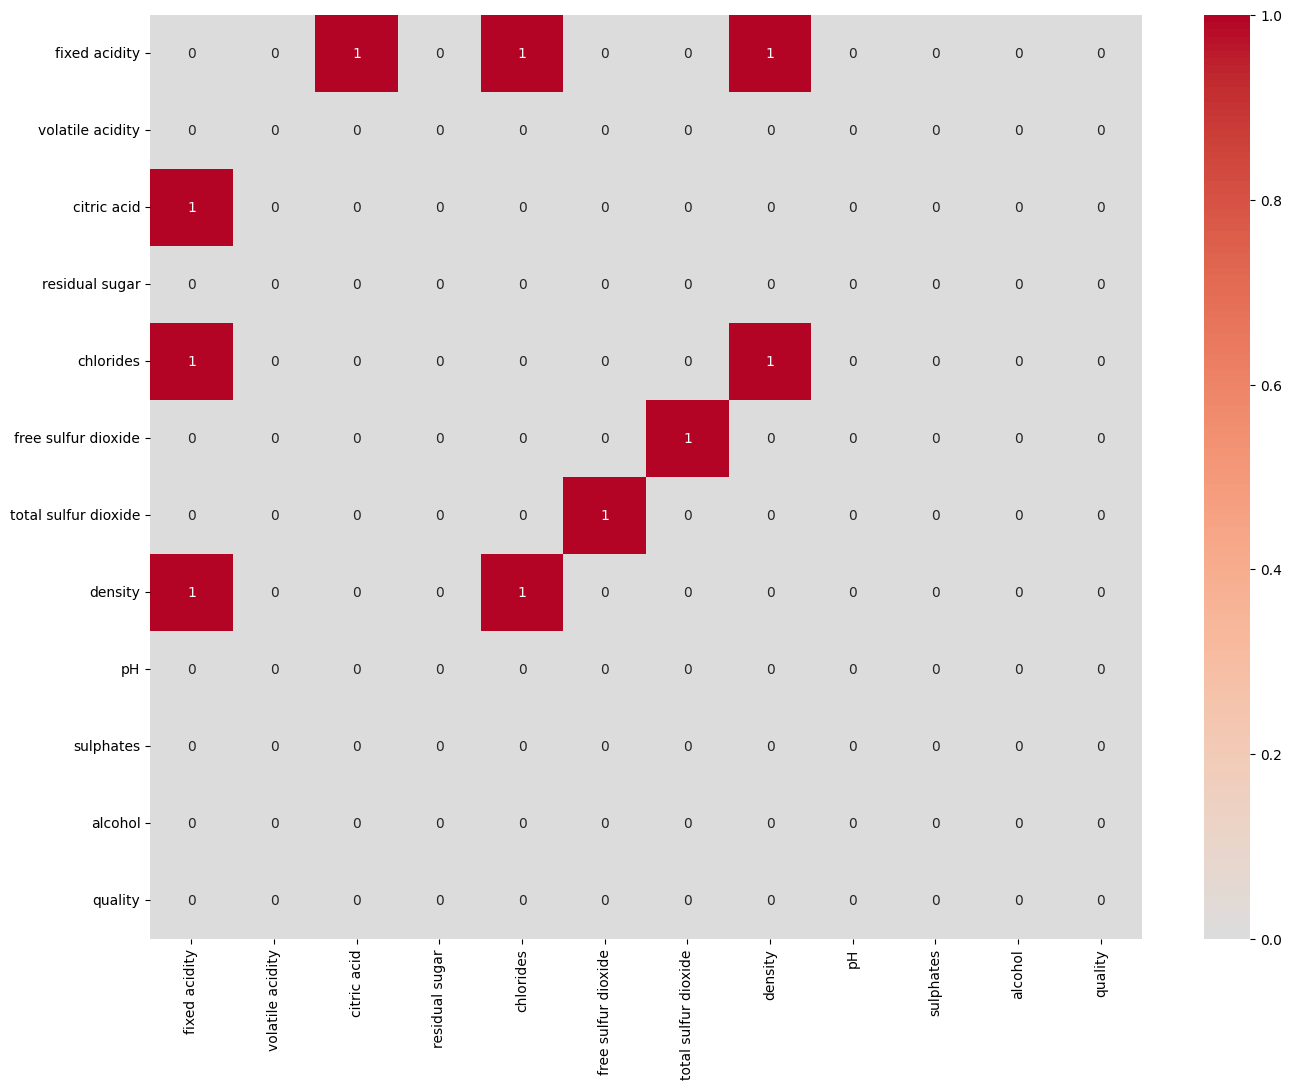

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_max_calidad.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

In [124]:
nombre_archivo = "vinos_max_calidad"

# Generamos el reporte
report = pp.ProfileReport(df_max_calidad)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')



ya está creado, relaja que ahí te lo abro


True

In [125]:
df_filtrado

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\1465898929.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["fixed acidity"],


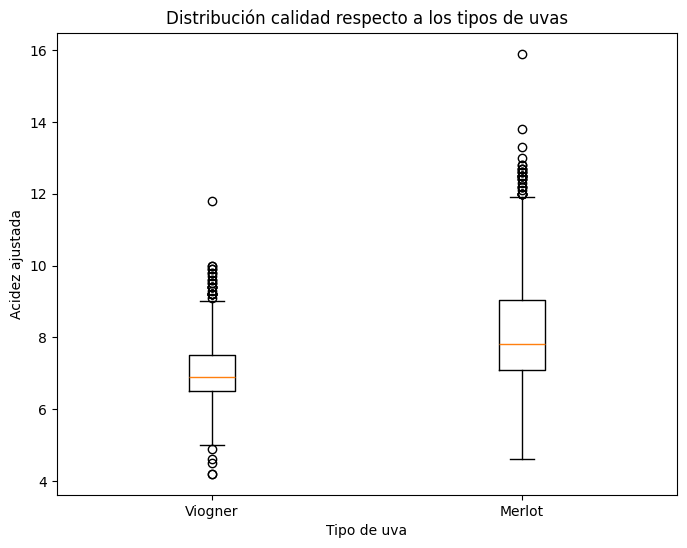

In [126]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["fixed acidity"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["fixed acidity"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez ajustada")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\2576040227.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["volatile acidity"],


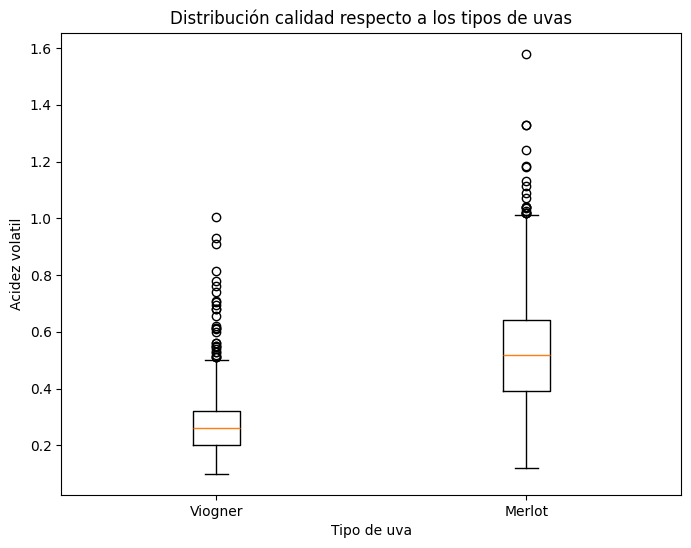

In [127]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["volatile acidity"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["volatile acidity"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez volatil")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

In [128]:
procentaje_uva_max_calidad = (df_max_calidad["type"].value_counts() / len(df_max_calidad)) *100
procentaje_uva_max_calidad.round(2)

type
Viogner    70.18
Merlot     29.82
Name: count, dtype: float64

In [129]:
procentaje_uva = (df_filtrado["type"].value_counts() / len(df_filtrado)) *100
procentaje_uva.round(2)

type
Merlot     50.6
Viogner    49.4
Name: count, dtype: float64

La uva Viogner tiene menor acidez volatil y ajustada en promedio que la uva Merlot, además de los vinos de maxima calidad hay mas Viogner que Merlot

C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\2166294571.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["citric acid"],


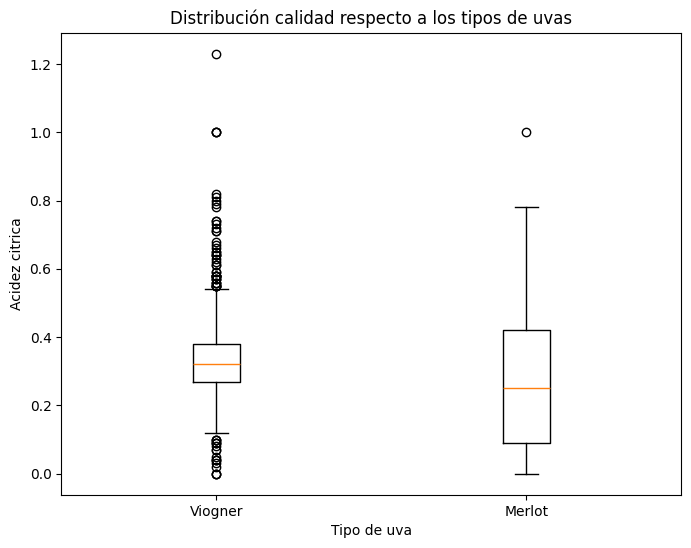

In [130]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["citric acid"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["citric acid"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez citrica")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\4028896426.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["residual sugar"],


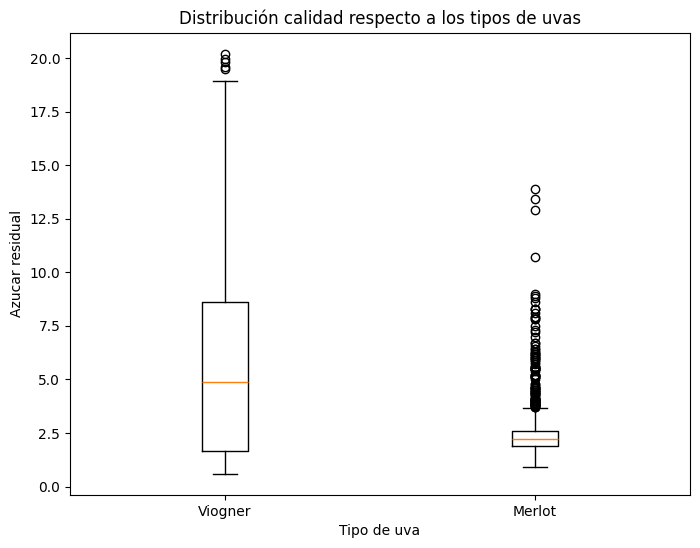

In [131]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["residual sugar"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["residual sugar"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Azucar residual")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

Clasificación según el azúcar residual:

    Vino extra seco: Hasta 4 g/L de azúcar residual. 
    
    Vino seco: Máximo 9g/L.
    
    Vino semiseco: Máximo 18 g/L. 
    
    Vino dulce: hasta 45 g/L. 
    
    https://glossaire.wein.plus/azucar-residual

Tener en cuenta que Viogner es un tipo de uva que se usa para hacer vino blanco y Merlot se usa para vino tinto.

C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\106761300.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["free sulfur dioxide"],


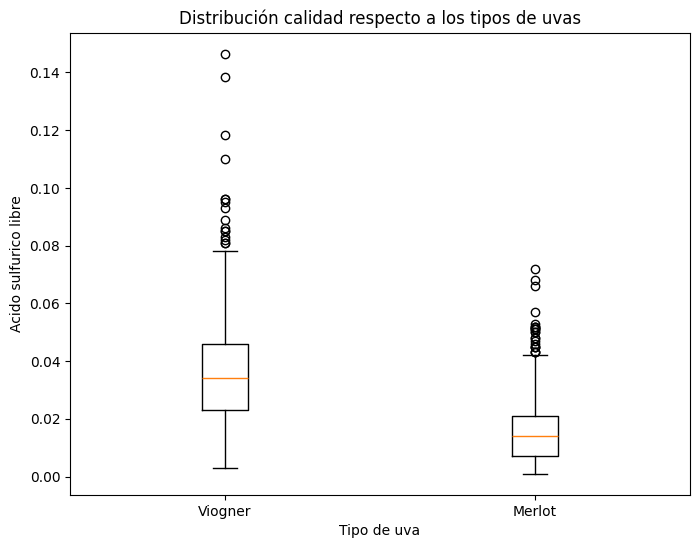

In [132]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["free sulfur dioxide"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["free sulfur dioxide"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acido sulfurico libre")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

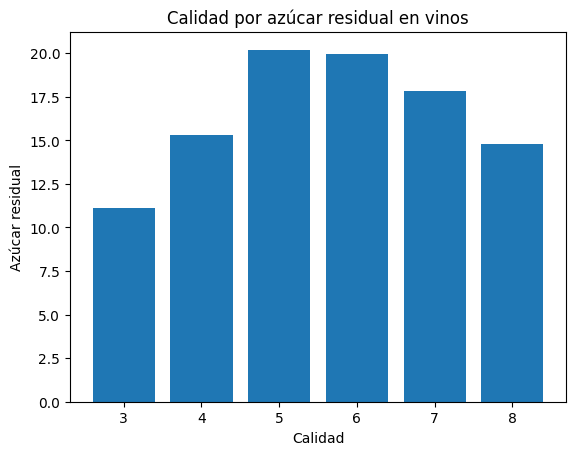

In [133]:
plt.bar(df_filtrado["quality"], df_filtrado["residual sugar"])

# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Azúcar residual")

# Agregar un título al gráfico
plt.title("Calidad por azúcar residual en vinos")
#plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
0
# Mostrar el gráfico
plt.show()

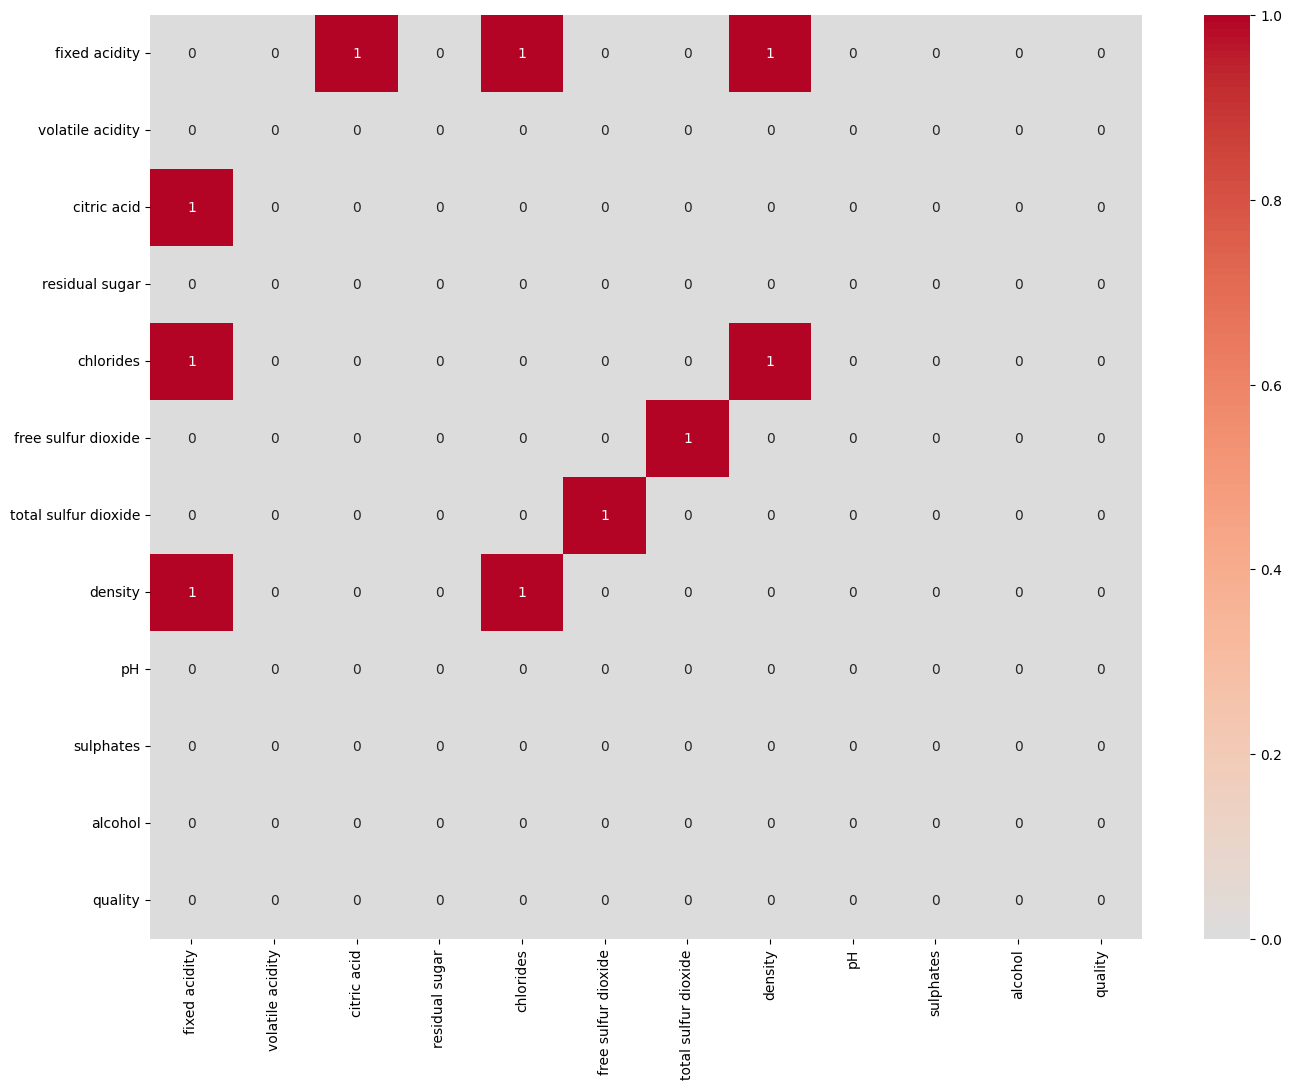

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_max_calidad.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\3956710310.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["density"],


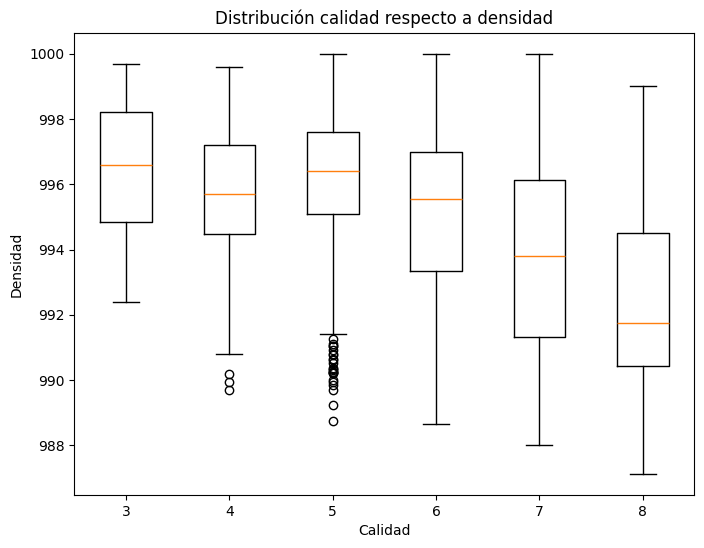

In [135]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["density"],
             df_filtrado[df_filtrado["quality"] == 4]["density"],
             df_filtrado[df_filtrado["quality"] == 5]["density"],
             df_filtrado[df_filtrado["quality"] == 6]["density"],
             df_filtrado[df_filtrado["quality"] == 7]["density"],
             df_filtrado[df_filtrado["quality"] == 8]["density"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Densidad")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a densidad")

# Mostrar el gráfico
plt.show()

OJO AL TEJO

C:\Users\Tomas\AppData\Local\Temp\ipykernel_3156\225601634.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["alcohol"],


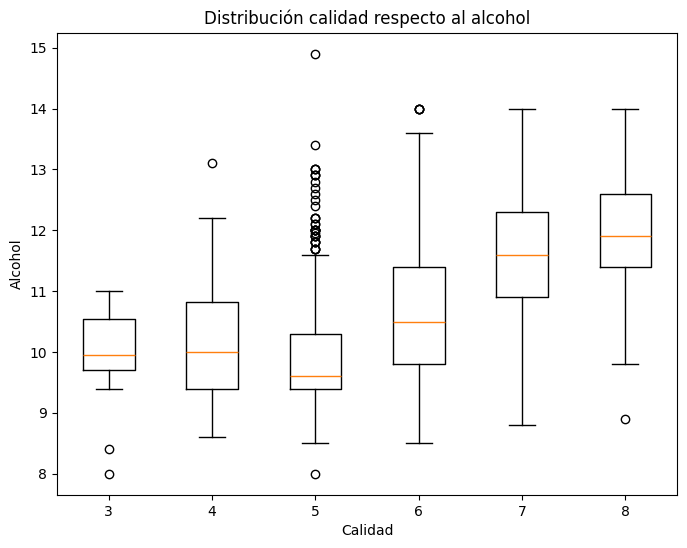

In [136]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 4]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 5]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 6]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 7]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 8]["alcohol"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Alcohol")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto al alcohol")

# Mostrar el gráfico
plt.show()

In [149]:
condicion = df_filtrado['type'] == "Viogner" # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_viogner = df_filtrado[condicion]
df_viogner

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,Viogner,7.4,0.190,0.31,14.5,0.045,0.039,0.193,998.60,3.10,0.50,9.2,6
1628,Viogner,6.3,0.320,0.32,1.5,0.030,0.024,0.101,989.23,3.21,0.42,13.0,5
1630,Viogner,6.5,0.260,0.31,3.6,0.030,0.036,0.092,990.26,3.22,0.62,12.6,8
1631,Viogner,5.9,0.240,0.12,1.4,0.035,0.060,0.247,993.58,3.34,0.44,9.6,6


In [150]:
condicion = df_filtrado['type'] == "Merlot" # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_merlot = df_filtrado[condicion]
df_merlot

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1633,Merlot,7.4,0.700,0.00,1.9,0.076,0.011,0.034,997.80,3.51,0.56,9.4,5
1634,Merlot,7.8,0.880,0.00,2.6,0.098,0.025,0.067,996.80,3.20,0.68,9.8,5
1635,Merlot,7.8,0.760,0.04,2.3,0.092,0.015,0.054,997.00,3.26,0.65,9.8,5
1636,Merlot,11.2,0.280,0.56,1.9,0.075,0.017,0.060,998.00,3.16,0.58,9.8,6
1638,Merlot,7.4,0.660,0.00,1.8,0.075,0.013,0.040,997.80,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


In [151]:
nombre_archivo = "vinosMerlot"

# Generamos el reporte
report = pp.ProfileReport(df_merlot)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')

c:\Users\Tomas\Desktop\Tomi Ilari\Facu\Fund\practico2\Tp-ciencia-de-datos-\.venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

In [152]:
nombre_archivo = "vinosViogner"

# Generamos el reporte
report = pp.ProfileReport(df_viogner)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')

c:\Users\Tomas\Desktop\Tomi Ilari\Facu\Fund\practico2\Tp-ciencia-de-datos-\.venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

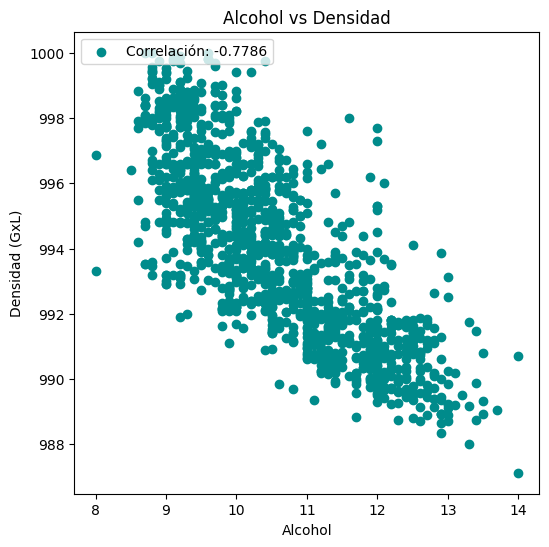

In [153]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_viogner["alcohol"]
datos_columna2 = df_viogner["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#008b8b")

# Añadir etiquetas y título
plt.ylabel("Densidad (GxL)")
plt.xlabel("Alcohol")
plt.title("Alcohol vs Densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()

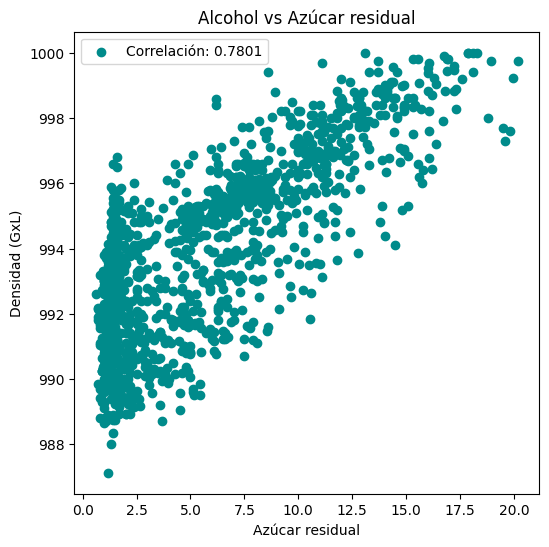

In [155]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_viogner["residual sugar"]
datos_columna2 = df_viogner["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#008b8b")

# Añadir etiquetas y título
plt.ylabel("Densidad (GxL)")
plt.xlabel("Azúcar residual")
plt.title("Alcohol vs Azúcar residual")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()

In [146]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Ordena los autovalores y autovectores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Ahora tienes la descomposición espectral
print("Autovalores:", sorted_eigenvalues)

print("Autovectores:")
print(sorted_eigenvectors)

LinAlgError: Array must not contain infs or NaNs

In [34]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# First center and scale the data
scaled_data = preprocessing.scale()
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
 
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

ModuleNotFoundError: No module named 'sklearn'